# Introduction
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

- Daily Time Spent on Site': consumer time on site in minutes
- Age': cutomer age in years
- Area Income': Avg. Income of geographical area of consumer
- Daily Internet Usage': Avg. minutes a day consumer is on the internet
- Ad Topic Line': Headline of the advertisement
- City': City of consumer
- Male': Whether or not consumer was male
- Country': Country of consumer
- Timestamp': Time at which consumer clicked on Ad or closed window
- Clicked on Ad': 0 or 1 indicated clicking on Ad

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

# Uploading the dataset

In [2]:
df = pd.read_csv('../input/advertising-dateset/advertising.csv')

In [3]:
##Let´s see the head of the data
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
##Now let´s see some high level information regarding to the dataset itself and it´s variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


As we can see in the step abovem there is no missing data which is great

In [5]:
#Now we can see some statistics
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# EDA
Let´s make some Exploratory Data Analysis

Text(0.5, 0, 'Age')

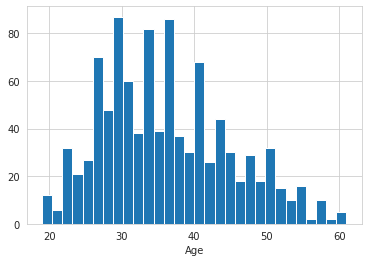

In [6]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

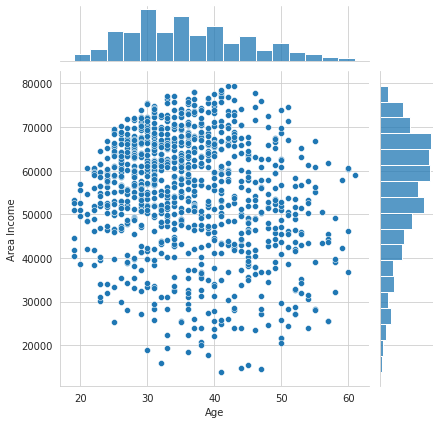

In [7]:
sns.jointplot(x='Age',y='Area Income',data=df)

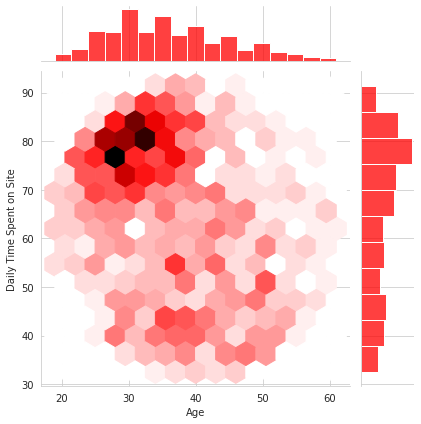

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='hex')

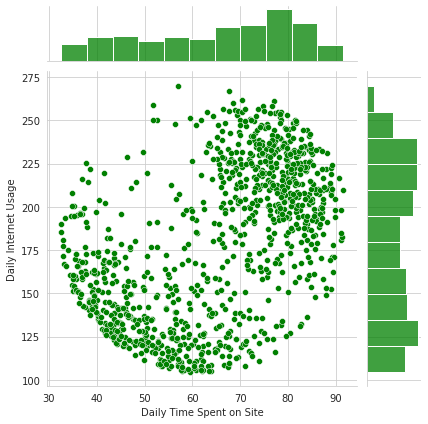

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')

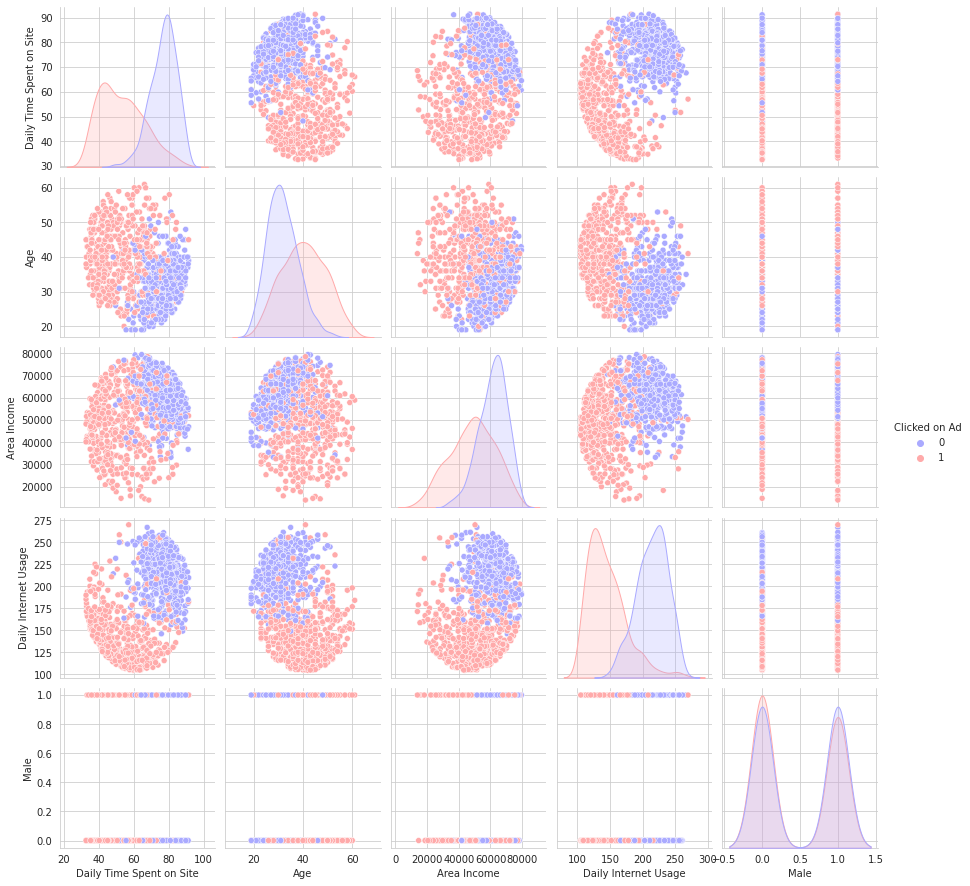

In [10]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

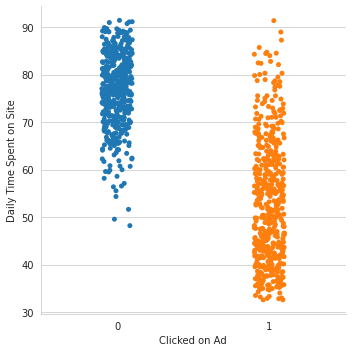

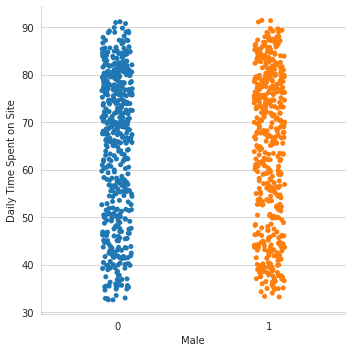

In [11]:
sns.catplot(y = 'Daily Time Spent on Site',x = 'Clicked on Ad',data = df)
sns.catplot(y = 'Daily Time Spent on Site',x = 'Male',data = df)

# Let´s built the Logistic Regression model
Now it's time to do a train test split, and train our model.

In [12]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
classificators = [['SVC',SVC()],
                  ['KNeighborsClassifier', KNeighborsClassifier()],
                  ['DecisionTreeClassifier', DecisionTreeClassifier()],
                  ['RandomForestClassifier', RandomForestClassifier()],
                  ['NaiveBayes',MultinomialNB()],
                  ['LogisticRegression',LogisticRegression()]]

In [15]:
Acc = pd.DataFrame(index=None, columns=['True positive','False positive','True Negative','False negative','Sum of Falses'])

In [16]:
for mod in classificators:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train.values.ravel())
    true_positive = confusion_matrix(y_test,model.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test,model.predict(X_test))[1][0]
    true_negative = confusion_matrix(y_test,model.predict(X_test))[1][1]
    false_negative = confusion_matrix(y_test,model.predict(X_test))[0][1]

    Acc = Acc.append(pd.Series({'model':name, 'True positive':true_positive,'False positive':false_positive, 'True Negative':true_negative, 'False negative':false_negative, 'Sum of Falses':false_positive + false_negative}),ignore_index=True )
Acc.sort_values(by='Sum of Falses',ascending = True)

,True positive,False positive,True Negative,False negative,Sum of Falses,model
3,152,9,134,5,14,RandomForestClassifier
2,149,9,134,8,17,DecisionTreeClassifier
5,149,14,129,8,22,LogisticRegression
4,144,32,111,13,45,NaiveBayes
0,134,58,85,23,81,SVC
1,120,47,96,37,84,KNeighborsClassifier


In [17]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
predictions = RFC.predict(X_test)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



<AxesSubplot:>

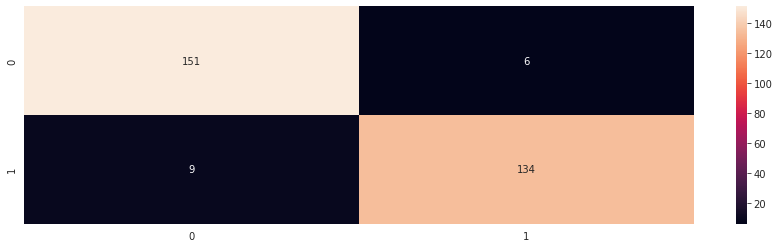

In [19]:
fig, ax = pyplot.subplots(figsize=(15,4))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt = '.3g')